<a href="https://colab.research.google.com/github/vanshraj126/Breast_ProstateCancer/blob/main/Cancer_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Creating a ML model ***

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the datasets
breast_cancer_df = pd.read_csv('data.csv')
prostate_cancer_df = pd.read_csv('prostate_cancer_dataset.csv')

### 🟢 **Preprocessing Breast Cancer Dataset**
# Drop unwanted column
if 'Unnamed: 32' in breast_cancer_df.columns:
    breast_cancer_df.drop(columns=['Unnamed: 32'], inplace=True)

# Check for missing values (excluding target)
print("\nMissing values before dropping:", breast_cancer_df.isnull().sum().sum())

# Drop any remaining NaN rows
breast_cancer_df.dropna(inplace=True)
print("Missing values after dropping:", breast_cancer_df.isnull().sum().sum())

# Ensure dataset isn't empty
if breast_cancer_df.shape[0] == 0:
    raise ValueError("ERROR: Breast cancer dataset is empty after preprocessing!")

# Drop the ID column (not a feature)
if 'id' in breast_cancer_df.columns:
    breast_cancer_df.drop(columns=['id'], inplace=True)

# Encode the target variable
breast_cancer_df['diagnosis'] = breast_cancer_df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X_breast = breast_cancer_df.iloc[:, 1:]  # All columns except 'diagnosis'
y_breast = breast_cancer_df.iloc[:, 0]   # 'diagnosis' column

# Standardizing features
scaler_breast = StandardScaler()
X_breast_scaled = scaler_breast.fit_transform(X_breast)

### ✅ **Preprocessing Complete**
print("Breast Cancer Dataset Processed: ", X_breast_scaled.shape, "Target:", y_breast.shape)



Missing values before dropping: 0
Missing values after dropping: 0
Breast Cancer Dataset Processed:  (569, 30) Target: (569,)


Preprocessing: Prostate Cancer Dataset

In [2]:
### 🟠 **Fix: Encode Categorical Features in Prostate Dataset**

# Convert binary categorical columns to numeric
binary_mappings = {
    'Family History': {'No': 0, 'Yes': 1},
    'Digital Rectal Exam': {'Normal': 0, 'Abnormal': 1},
    'Biopsy Result': {'Benign': 0, 'Malignant': 1},
    'Diagnosis': {'No Cancer': 0, 'Cancer': 1}  # Target variable
}

for col, mapping in binary_mappings.items():
    if col in prostate_cancer_df.columns:
        prostate_cancer_df[col] = prostate_cancer_df[col].map(mapping)

# One-hot encode 'Gleason Score' (multi-class categorical feature)
prostate_cancer_df = pd.get_dummies(prostate_cancer_df, columns=['Gleason Score'], drop_first=True)

# Separate features and target
X_prostate = prostate_cancer_df.drop(columns=['Diagnosis'])  # Features
y_prostate = prostate_cancer_df['Diagnosis']  # Target

# Standardizing numerical features
scaler_prostate = StandardScaler()
X_prostate_scaled = scaler_prostate.fit_transform(X_prostate)

### ✅ **Preprocessing Complete**
print("Processed Prostate Cancer Dataset: ", X_prostate_scaled.shape, "Target:", y_prostate.shape)


Processed Prostate Cancer Dataset:  (150, 8) Target: (150,)


**Training the ML Model**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

### 🟢 **Train Breast Cancer Model**
X_train_breast, X_test_breast, y_train_breast, y_test_breast = train_test_split(
    X_breast_scaled, y_breast, test_size=0.2, random_state=42
)

breast_cancer_model = RandomForestClassifier(random_state=42)
breast_cancer_model.fit(X_train_breast, y_train_breast)

# Evaluate Model
y_pred_breast = breast_cancer_model.predict(X_test_breast)
print("🔹 Breast Cancer Model Accuracy:", accuracy_score(y_test_breast, y_pred_breast))
print(classification_report(y_test_breast, y_pred_breast))

# Save Model
joblib.dump(breast_cancer_model, "breast_cancer_model.pkl")


### 🔵 **Train Prostate Cancer Model**
X_train_prostate, X_test_prostate, y_train_prostate, y_test_prostate = train_test_split(
    X_prostate_scaled, y_prostate, test_size=0.2, random_state=42
)

prostate_cancer_model = RandomForestClassifier(random_state=42)
prostate_cancer_model.fit(X_train_prostate, y_train_prostate)

# Evaluate Model
y_pred_prostate = prostate_cancer_model.predict(X_test_prostate)
print("🔹 Prostate Cancer Model Accuracy:", accuracy_score(y_test_prostate, y_pred_prostate))
print(classification_report(y_test_prostate, y_pred_prostate))

# Save Model
joblib.dump(prostate_cancer_model, "prostate_cancer_model.pkl")

print("✅ Models Trained and Saved!")


🔹 Breast Cancer Model Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

🔹 Prostate Cancer Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

✅ Models Trained and Saved!


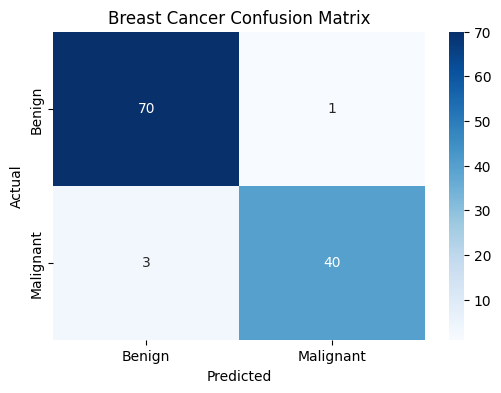

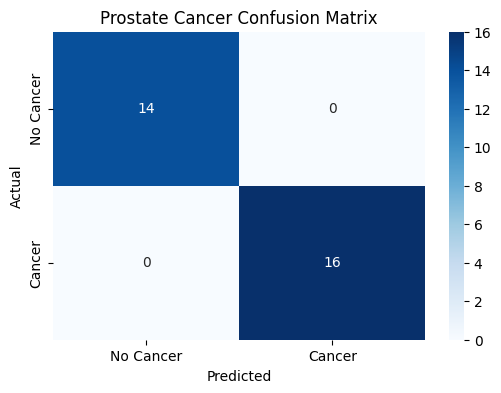

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, title, labels):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Plot for Breast Cancer
plot_confusion_matrix(y_test_breast, y_pred_breast, "Breast Cancer Confusion Matrix", labels=['Benign', 'Malignant'])

# Plot for Prostate Cancer
plot_confusion_matrix(y_test_prostate, y_pred_prostate, "Prostate Cancer Confusion Matrix", labels=['No Cancer', 'Cancer'])


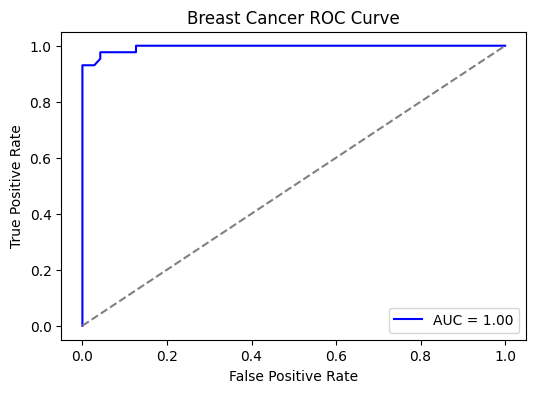

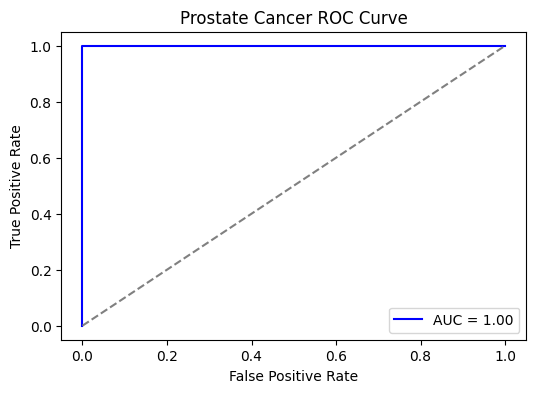

In [5]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_test, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Get probability scores for ROC Curve
y_pred_breast_prob = breast_cancer_model.predict_proba(X_test_breast)[:, 1]
y_pred_prostate_prob = prostate_cancer_model.predict_proba(X_test_prostate)[:, 1]

# Plot ROC Curves
plot_roc_curve(y_test_breast, y_pred_breast_prob, "Breast Cancer ROC Curve")
plot_roc_curve(y_test_prostate, y_pred_prostate_prob, "Prostate Cancer ROC Curve")


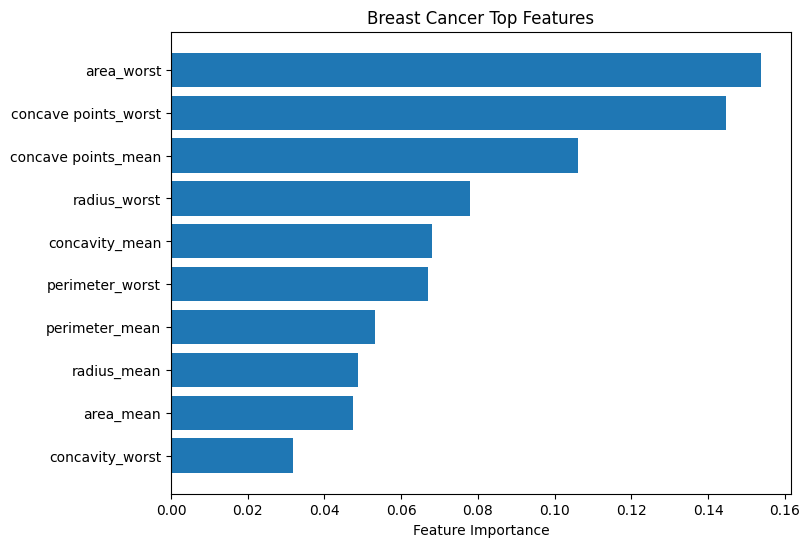

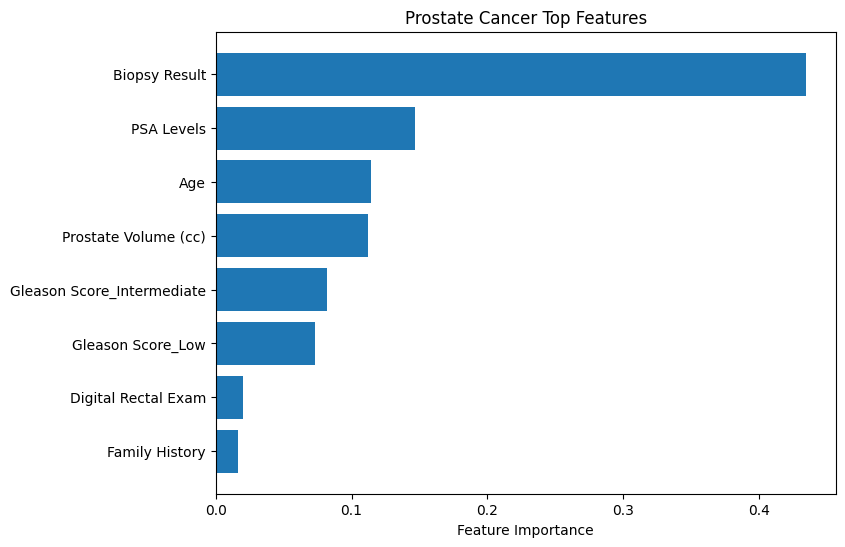

In [6]:
import numpy as np

def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    sorted_indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(8,6))
    plt.barh(range(len(sorted_indices[:10])), importance[sorted_indices[:10]], align='center')
    plt.yticks(range(len(sorted_indices[:10])), np.array(feature_names)[sorted_indices[:10]])
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Breast Cancer Feature Importance
plot_feature_importance(breast_cancer_model, X_breast.columns, "Breast Cancer Top Features")

# Prostate Cancer Feature Importance
plot_feature_importance(prostate_cancer_model, X_prostate.columns, "Prostate Cancer Top Features")
